In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


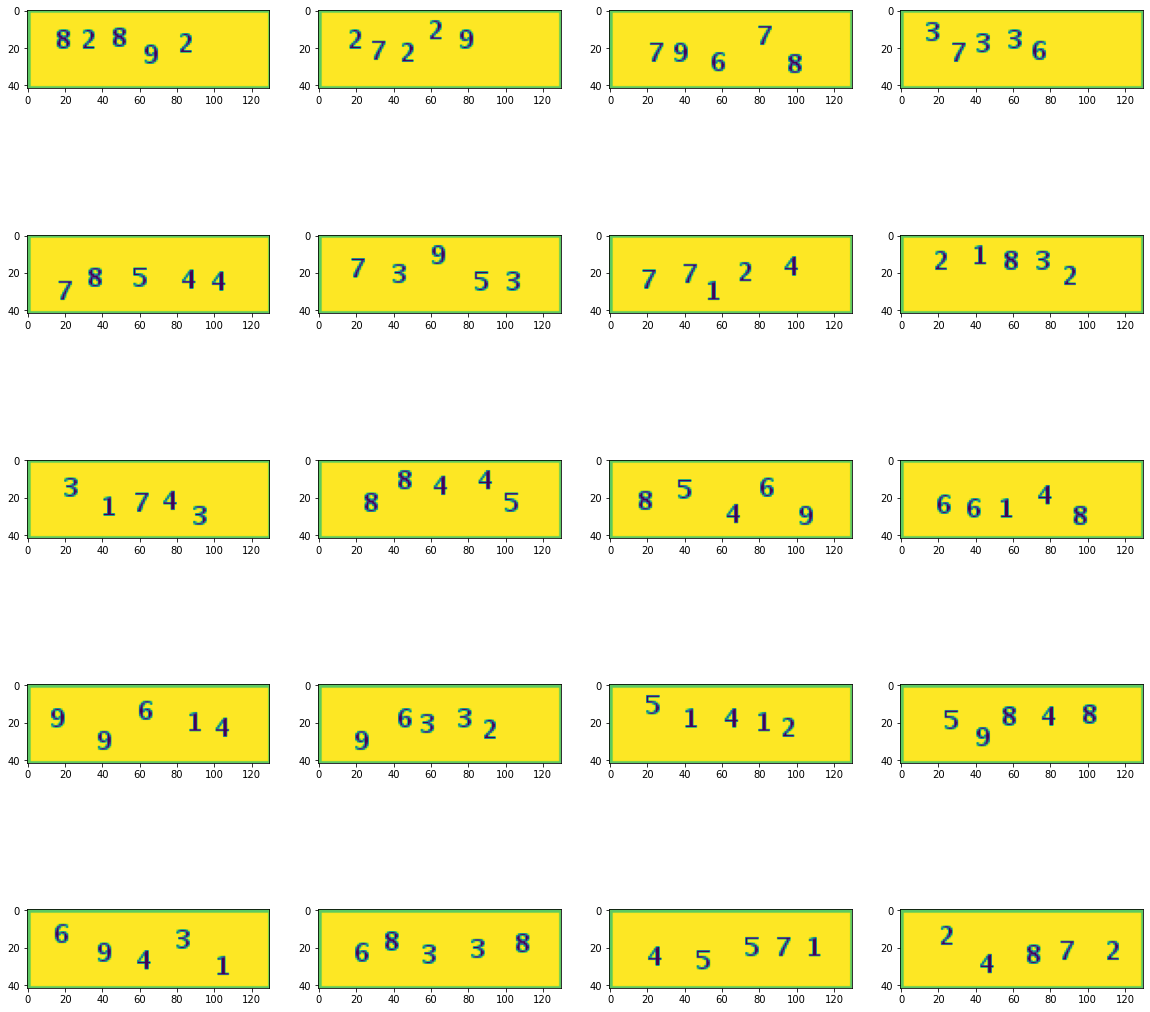

In [8]:
import random
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

    
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    cap = rgb2gray(plt.imread("/content/drive/MyDrive/Colab Notebooks/electoral-captchas/{}.png".format(random.randint(0, 200))))
    im = resize(cap[:, 30:50], (20, 20), anti_aliasing=True)
    plt.imshow(cap)
plt.show()

#Trying to observe data for patterns for splitting 

(42, 130)


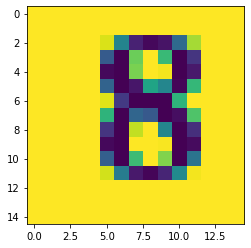

In [9]:
cap = rgb2gray(plt.imread("/content/drive/MyDrive/Colab Notebooks/electoral-captchas/{}.png".format(9)))
# cap=cap.reshape
print(cap.shape)

plt.imshow(cap[18:33, 15:30])
## Tried to figure out the index for cropping out this number

209.64703

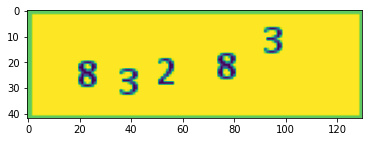

In [10]:
plt.imshow(cap)
np.sum(cap[10:25, 10:25])

In [11]:
np.round(cap[18:33, 15:30])
# Notice pattern of 0 closely... Looks like 8

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.

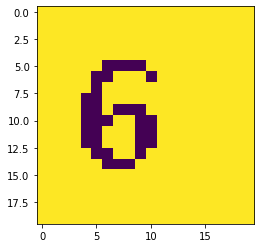

In [12]:

cap = rgb2gray(plt.imread("/content/drive/MyDrive/Colab Notebooks/electoral-captchas/{}.png".format(random.randint(0, 500))))
prr = np.round(cap)

def extract_digit(arr):
    l=[]
    i=len(arr[0])-1
    c=0
    while(i>=0):
        for j in range(len(arr)):
            if arr[j][i] == 0: c+=1
            if c==2:
    #             temp = arr[i-2:i+13, j-11:j+4]
                pos = [i, j]
                l.append(pos)
                i=i-13; c=0; break
        i-=1
    return l
    
x=extract_digit(prr)[0]
plt.imshow(prr[max(x[1]-10, 0):x[1]+10, x[0]-10:x[0]+10])
# height and width of 20 is best for this data (All of that particular number is covered and any other number doesn't show up also)

In [14]:
cap = rgb2gray(plt.imread("/content/drive/MyDrive/Colab Notebooks/electoral-captchas/{}.png".format(random.randint(0, 500))))
arr = np.round(cap)

x=extract_digit(arr)[0]
temp= resize(arr[max(x[1]-10, 0):x[1]+10, x[0]-10:x[0]+10], (20, 20, 1)).round()
# Reshaped because 3D is preferred by CNN

print(temp.shape)

(20, 20, 1)


In [15]:
import os


In [19]:
data=[]; label=[]

for loc in os.listdir("/content/drive/MyDrive/Colab Notebooks/electoral-tagged"):
    if loc[6:]=="png":
        cap = rgb2gray(plt.imread("/content/drive/MyDrive/Colab Notebooks/electoral-tagged/{}".format(loc)))
        rar = np.round(cap)

        pos=extract_digit(rar)
        k=0
        for x in pos:
            f_im =  resize(rar[max(x[1]-10, 0):x[1]+10, x[0]-10:x[0]+10], (20, 20, 1)).round()
            data.append(f_im)
            label.append(loc[-5-k])
            k+=1
# Cropping of data

In [20]:
pd.DataFrame(label).value_counts()

5    533
7    527
4    524
8    521
6    519
9    518
1    516
3    515
2    507
dtype: int64

In [22]:
data = np.array(data)
label = np.array(label)

In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [25]:
y_lab = keras.utils.to_categorical(label, 10)

In [26]:
model=keras.Sequential([
    keras.Input(shape=(20, 20, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation = "relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [27]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [28]:
model.fit(data, y_lab, batch_size=128, epochs=30, validation_split=0.1)


Epoch 1/30
33/33 [==============================] - 2s 45ms/step - loss: 2.1837 - accuracy: 0.1992 - val_loss: 1.7604 - val_accuracy: 0.8739
Epoch 2/30
33/33 [==============================] - 1s 39ms/step - loss: 1.5385 - accuracy: 0.7318 - val_loss: 0.7100 - val_accuracy: 0.9338
Epoch 3/30
33/33 [==============================] - 1s 38ms/step - loss: 0.5983 - accuracy: 0.8981 - val_loss: 0.2698 - val_accuracy: 0.9487
Epoch 4/30
33/33 [==============================] - 1s 43ms/step - loss: 0.2582 - accuracy: 0.9460 - val_loss: 0.1634 - val_accuracy: 0.9615
Epoch 5/30
33/33 [==============================] - 1s 38ms/step - loss: 0.1598 - accuracy: 0.9634 - val_loss: 0.1099 - val_accuracy: 0.9829
Epoch 6/30
33/33 [==============================] - 1s 39ms/step - loss: 0.0963 - accuracy: 0.9829 - val_loss: 0.0756 - val_accuracy: 0.9893
Epoch 7/30
33/33 [==============================] - 1s 39ms/step - loss: 0.0829 - accuracy: 0.9850 - val_loss: 0.0620 - val_accuracy: 0.9957
Epoch 8/30
33

In [ ]:
# Accuracy of 99.79% on Validation data!!

In [29]:
cap = rgb2gray(plt.imread("/content/drive/MyDrive/Colab Notebooks/electoral-captchas/{}.png".format(random.randint(0, 500))))
arr = np.round(cap)

x=extract_digit(arr)[0]
temp= resize(arr[max(x[1]-10, 0):x[1]+10, x[0]-10:x[0]+10], (20, 20, 1)).round()

print(temp.shape)
#Chechking for any issues before applying on the whole test set

(20, 20, 1)


In [30]:
model.predict_classes(np.array([temp]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2])

In [34]:
test=[]; #label=[]

for loc in range(1500):
    cap = rgb2gray(plt.imread("/content/drive/MyDrive/Colab Notebooks/electoral-captchas/{}.png".format(loc)))
    rar = np.round(cap)\

    pos=extract_digit(rar)
    k=0
    for x in pos:
        f_im =  resize(rar[max(x[1]-10, 0):x[1]+10, x[0]-10:x[0]+10], (20, 20, 1)).round()
        test.append(f_im)
#             label.append(loc[-5-k])
        k+=1
# Transformation applied on test set



In [35]:
test = np.array(test)

In [36]:
test.shape

(7499, 20, 20, 1)

In [37]:
pred = model.predict_classes(test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
pred

array([2, 7, 3, ..., 2, 3, 7])

In [39]:
pred[:5]
("".join(map(str, pred[5:10])))[::-1]

'21559'

In [45]:
j = 0
index = []
pred_captcha = []
for i in range(0, 1500, 5):
    pred_captcha.append("".join(map(str, pred[i:i+5]))[::-1])
    index.append(j)
    j +=1

In [46]:
pred_captcha[3]

'96444'

In [48]:
captcha_read = np.column_stack((index,pred_captcha))
# file name with prediction

In [49]:
captcha_read

array([['0', '66372'],
       ['1', '21559'],
       ['2', '18343'],
       ['3', '96444'],
       ['4', '63259'],
       ['5', '42197'],
       ['6', '31362'],
       ['7', '78224'],
       ['8', '34592'],
       ['9', '83283'],
       ['10', '45761'],
       ['11', '64273'],
       ['12', '88559'],
       ['13', '37359'],
       ['14', '58513'],
       ['15', '51412'],
       ['16', '28369'],
       ['17', '78522'],
       ['18', '98472'],
       ['19', '79382'],
       ['20', '53626'],
       ['21', '79678'],
       ['22', '21832'],
       ['23', '88445'],
       ['24', '49871'],
       ['25', '21584'],
       ['26', '97695'],
       ['27', '57653'],
       ['28', '78544'],
       ['29', '97836'],
       ['30', '82892'],
       ['31', '68281'],
       ['32', '25518'],
       ['33', '97414'],
       ['34', '99726'],
       ['35', '65719'],
       ['36', '22527'],
       ['37', '49396'],
       ['38', '42689'],
       ['39', '35168'],
       ['40', '72789'],
       ['41', '12737'],
  